In [1]:
import phasr as phr

In [2]:
phr.__version__

'0.4.1.dev114+g5744fc29a'

In [3]:
import numpy as np
pi=np.pi
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from IPython.display import display, Math

In [5]:
def print_radius(charge_dict,manual_digits_offset=0):
    redchisq=charge_dict['redchisq']
    
    r_ch=charge_dict['r_ch']
    
    dr=charge_dict['dr_ch_stat']*np.sqrt(redchisq)
    dr_s=charge_dict['dr_ch_syst']
    dr_m=charge_dict['dr_ch_model']
    dr_u=charge_dict['dr_ch_syst_upper']
    dr_l=charge_dict['dr_ch_syst_lower']
    dr_d=charge_dict['dr_ch_dist']
    dr_d_u=charge_dict['dr_ch_dist_upper']
    dr_d_l=charge_dict['dr_ch_dist_lower']
    dr_dm=np.sqrt(dr**2+dr_d**2)
    
    digs_r=int(-np.log10(dr))+2
    
    while np.max([dr,dr_s,dr_m])*10**digs_r>69: 
        digs_r-=1
    while np.max([dr,dr_s,dr_m])*10**digs_r<3.1:
        digs_r+=1

    digs_r+=manual_digits_offset
    
    s=r'\sqrt{\langle r^2 \rangle} = '+r'{r_ch:1.{digs_r}f}({dr:1d})'.format(r_ch=r_ch,digs_r=digs_r,dr=int(np.round(dr*10**digs_r,0)))+r'\begin{matrix}'+r'({dr_s:1d}) [{dr_m:1d}] \\ ( +{dr_d_u:1d}/-{dr_d_l:1d} ) [{dr_dm:1d}]'.format(dr_s=int(np.round(dr_s*10**digs_r,0)),dr_m=int(np.round(dr_m*10**digs_r,0)),dr_d_u=int(np.round(dr_d_u*10**digs_r,0)),dr_d_l=int(np.round(dr_d_l*10**digs_r,0)),dr_dm=int(np.round(dr_dm*10**digs_r,0)))+r'\end{matrix}'
    display(Math(s))

# Import data

## Cross section Data

In [6]:
path_Ar40_Ot82 = "./Ottermann1982_Ar40.txt"

In [8]:
#How to anser the questions: 
#What column (starting at 0) contains the central values for the energie? 0
#In what units is the energy (MeV or GeV)? MeV
#What column (starting at 0) contains the central values for the angles? 1
#In what units is the angle theta (deg or rad)? deg
#Does the file contain direct cross sections or relative measurements to a different nucleus? (answer with: direct or relative) direct
#What column (starting at 0) contains the central values for the cross section? 2
#In what units is the cross section (fmsq, cmsq, mub, mb or invMeVsq)? fmsq
#Does the data distinguish between statistical and systematical uncertainties? (y or n) y
#What columns (starting at 0), if any, contain statistical uncertainties for the cross sections (separate by comma)? 3
#Are the statistical uncertainties absolute values or relative to the central value? (answer with: absolute or relative) relative
#Are the relative statistical uncertainties in percent and thus need to divided by 100? (y or n) y
#What columns (starting at 0), if any, contain systematical uncertainties for the cross sections (separate by comma)? 4
#Are the systematical uncertainties absolute values or relative to the central value? (answer with: absolute or relative) relative
#Are the relative systematical uncertainties in percent and thus need to divided by 100? (y or n) y
#Do you want to add a global relative statistical uncertainty w.r.t. the cross section as an (additional) uncertainty component? (For 3% insert 3, type 0 if you do not want to do so)? 0
#Do you want to add a global relative systematical uncertainty w.r.t. the cross section as an (additional) uncertainty component? (For 3% insert 3, type 0 if you do not want to do so)? 0.8

In [7]:
phr.import_dataset(path_Ar40_Ot82,"Ottermann1982",18,40)

What column (starting at 0) contains the central values for the energie? 0
In what units is the energy (MeV or GeV)? MeV
What column (starting at 0) contains the central values for the angles? 1
In what units is the angle theta (deg or rad)? deg
Does the file contain direct cross sections or relative measurements to a different nucleus? (answer with: direct or relative) direct
What column (starting at 0) contains the central values for the cross section? 2
In what units is the cross section (fmsq, cmsq, mub, mb or invMeVsq)? fmsq
Does the data distinguish between statistical and systematical uncertainties? (y or n) y
What columns (starting at 0), if any, contain statistical uncertainties for the cross sections (separate by comma)? 3
Are the statistical uncertainties absolute values or relative to the central value? (answer with: absolute or relative) relative
Are the relative statistical uncertainties in percent and thus need to divided by 100? (y or n) y
What columns (starting at 0), 

cross section data saved in  ./data/cross_section_data/cross_section_Ottermann1982_Z18_A40.txt
cross section statistical correlation data saved in  ./data/cross_section_data/cross_section_Ottermann1982_Z18_A40_correlation_stat.txt
cross section systematical correlation data saved in  ./data/cross_section_data/cross_section_Ottermann1982_Z18_A40_correlation_syst.txt
The dataset Ottermann1982_Z18_A40 can now be accessed by the fitting routines


### Compare Data to reference parameterization

In [9]:
# Comparison extraction from dVries et al. 1987
nuc_Ar40_ref = phr.nuclei.load_reference_nucleus(18,40)
nuc_Ar40_ref

In [10]:
data_Ar40, corr_stat_Ar40, corr_syst_Ar40 = phr.cross_section_fitter.data_prepper.load_dataset("Ottermann1982",18,40)

cross section data loaded from  ./data/cross_section_data/cross_section_Ottermann1982_Z18_A40.txt
cross section statistical correlation data loaded from  ./data/cross_section_data/cross_section_Ottermann1982_Z18_A40_correlation_stat.txt
cross section systematical correlation data loaded from  ./data/cross_section_data/cross_section_Ottermann1982_Z18_A40_correlation_syst.txt


In [11]:
args_optimised =  {'method': 'DOP853',
 'N_partial_waves': 25,
 'atol': 1e-08,
 'rtol': 1e-06,
 'energy_norm': 0.001973269804,
 'phase_difference_limit': 1e-06}

In [12]:
theta=np.arange(25,100,1)*pi/180
CS={}
for E in np.unique(data_Ar40[:,0]):
    CS[E]=phr.crosssection_lepton_nucleus_scattering(E,theta,nuc_Ar40_ref,**args_optimised)*phr.constants.hc**2

Text(0, 0.5, 'cross section in fm$^{2}$/sr')

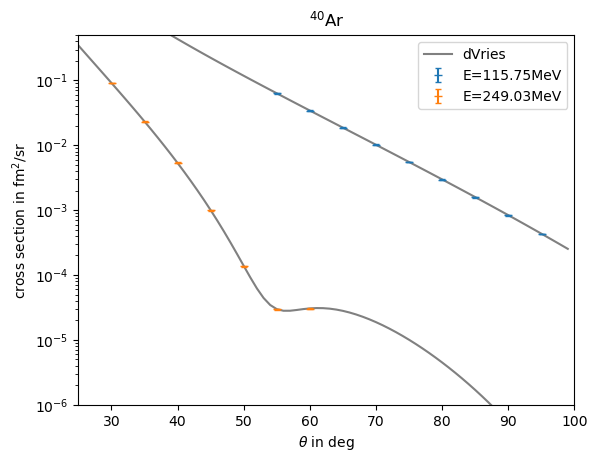

In [13]:
for E in np.unique(data_Ar40[:,0]):
    mask = data_Ar40[:,0]==E
    plt.errorbar(data_Ar40[mask,1]*180/pi,data_Ar40[mask,2],np.sqrt(data_Ar40[mask,3]**2+data_Ar40[mask,4]**2),capsize=2,marker='_',linestyle='',label='E='+str(E)+'MeV')
first = True
for E in np.unique(data_Ar40[:,0]):
    plt.plot(theta*180/pi,CS[E],color='gray',zorder=-2,label='dVries' if first else None)
    first=False
plt.yscale('log')
plt.legend()
plt.xlim(25,100)
plt.ylim(1e-6,5e-1)
plt.title(r'$^{40}$Ar')
plt.xlabel(r'$\theta$ in deg')
plt.ylabel(r'cross section in fm$^{2}$/sr')

## Barrett Moment

In [14]:
path_example = "./Fricke1995_barrett_moments.txt"

with open( path_example, "rb" ) as file:
    barrett_moments_input = np.genfromtxt( file,dtype=[r'<U3',int,int,r'<U10']+9*[float],names=['Symbol','Z','A','transition','E_tran','dE_tran','N_pol','alpha','k','C_z','barrett','dbarrett_stat','dbarrett_pol'])

pd.DataFrame(barrett_moments_input)

Symbol   Z    A transition     E_tran  dE_tran   N_pol   alpha       k  \
0       Be   4    9     2p->1s    33.4020   0.0100  0.0010  0.0420  2.1160   
1        B   5   -1     2p->1s    52.2570   0.0070  0.0010  0.0440  2.1190   
2        C   6   12     2p->1s    75.2582   0.0005  0.0025  0.0208  2.0231   
3        C   6   13     2p->1s    75.3127   0.0040  0.0025  0.0208  2.0231   
4        C   6   14     2p->1s    75.3514   0.0030  0.0025  0.0208  2.0234   
..     ...  ..  ...        ...        ...      ...     ...     ...     ...   
326     Pb  82  207   2p32->1s  5968.8640   0.2100  2.3040  0.1486  2.3035   
327     Pb  82  208   2p12->1s  5778.0580   0.1000  2.9450  0.1507  2.3076   
328     Pb  82  208   2p32->1s  5962.8540   0.0900  2.7180  0.1485  2.3037   
329     Bi  83  209   2p12->1s  5843.2000   0.0025  3.8440  0.1540  2.3290   
330     Bi  83  209   2p32->1s  6034.0000   0.0022  3.8440  0.1540  2.3390   

        C_z  barrett  dbarrett_stat  dbarrett_pol  
0   -20.800   5.6613         0.7697        0.0222  
1    -8.600   5.9557         0.2277        0.0113  
2    -4.141   5.9419         0.0077        0.0121  
3    -4.135   5.9313         0.0602        0.0113  
4    -4.095   6.0453         0.0453        0.0107  
..      ...      ...            ...           ...  
326  -1.402  21.1688         0.0013        0.0044  
327  -1.474  21.0982         0.0009        0.0056  
328  -1.404  21.2294         0.0004        0.0048  
329  -1.458  21.5694         0.0158        0.0079  
330  -1.386  21.9483         0.0135        0.0081  

[331 rows x 13 columns]

In [15]:
barrett_moment_Ar40 = barrett_moments_input[np.logical_and(barrett_moments_input['Z']==18,barrett_moments_input['A']==40)]
barrett_moment_Ar40_dict = {key:barrett_moment_Ar40[key][0] for key in  ['Z','A','k','alpha','barrett']}
barrett_moment_Ar40_dict['dbarrett'] = np.sqrt(barrett_moment_Ar40['dbarrett_stat'][0]**2 + barrett_moment_Ar40['dbarrett_pol'][0]**2)

In [16]:
barrett_moment_Ar40_dict

{'Z': np.int64(18),
 'A': np.int64(40),
 'k': np.float64(2.0827),
 'alpha': np.float64(0.0546),
 'barrett': np.float64(10.5669),
 'dbarrett': np.float64(0.012425779653607253)}

In [17]:
phr.cross_section_fitter.data_prepper.import_barrett_moment("Fricke1995_2p",**barrett_moment_Ar40_dict)

barrett moment value saved in  ./data/barrett_moment_data/barrett_moment_Fricke1995_2p_Z18_A40.txt
The barrett moment value with label Fricke1995_2p_Z18_A40 can now be accessed by the fitting routines


# Base fits

In [18]:
# Check available datasets

In [19]:
phr.cross_section_fitter.data_prepper.list_datasets(18,40)

These loaded datasets were found for Z=18 and A=40:
['Ottermann1982']


In [20]:
phr.cross_section_fitter.data_prepper.list_barrett_moments(18,40)

These loaded datasets were found for Z=18 and A=40:
['Fricke1995_2p']


In [21]:
args_optimised =  {'method': 'DOP853',
 'N_partial_waves': 25,
 'atol': 1e-08,
 'rtol': 1e-06,
 'energy_norm': 0.001973269804,
 'phase_difference_limit': 1e-06}

In [22]:
results_dict = phr.cross_section_fitter.fit_organizer.parallel_fitting_automatic(['Ottermann1982'],18,40,np.arange(4.00,8.75+0.25,0.25),redo_N=True,redo_aggressive=True,N_base_offset=1,N_base_span=3,cross_section_args=args_optimised)

Queuing 102 tasks, which will be performed over 6 processes.
Finished all tasks.
Check if any fits need to be redone.
For R5.75_N6 chi^2 with 1 less parameter is more than 1 permil better: 11.912001534760861 vs 11.057261857466806
For R6.25_N6 chi^2 with 1 less parameter is more than 1 permil better: 5754.768161487707 vs 10.603547808331065
For R6.25_N7 chi^2 with 2 less parameter is more than 1 permil better: 5498.120770905572 vs 10.603547808331065
For R7.0_N5 chi^2 with 1 less parameter is more than 1 permil better: 11.061470900571166 vs 10.518139977078762
For R7.75_N7 chi^2 with 1 less parameter is more than 1 permil better: 12.249547656658462 vs 10.331939288014729
For R7.75_N8 chi^2 with 2 less parameter is more than 1 permil better: 17.570650580719906 vs 10.331939288014729
For R8.0_N7 chi^2 with 1 less parameter is more than 1 permil better: 25096.71250870271 vs 10.322012751932105
For R8.0_N8 chi^2 with 2 less parameter is more than 1 permil better: 25998.625201169616 vs 10.32201275

In [23]:
database_tables, Rs, Ns, hist = phr.cross_section_fitter.generate_data_tables(results_dict)

In [24]:
pd.DataFrame(database_tables['p_val'],index=Rs,columns=Ns)

3.0            4.0            5.0            6.0       7.0  \
4.00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00       NaN   
4.25   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00       NaN   
4.50   0.000000e+00  3.839800e-235  2.040613e-180  1.431578e-149       NaN   
4.75  3.472725e-201  2.432609e-106   3.580043e-61   2.447410e-39       NaN   
5.00  6.732223e-113   4.407200e-30   2.982187e-06   3.480082e-02  0.033821   
5.25   8.065356e-58   3.594259e-02   1.585879e-01   1.491464e-01  0.128603   
5.50   3.742389e-27   3.450933e-01   3.928475e-01   3.950161e-01  0.349871   
5.75   1.127148e-12   4.910698e-01   5.240178e-01   4.384610e-01  0.377546   
6.00   1.685241e-07   5.746593e-01   5.539131e-01   4.752856e-01  0.389338   
6.25   8.635175e-08   6.150074e-01   5.631648e-01   4.770553e-01  0.389232   
6.50   1.434949e-14   6.349885e-01   5.670895e-01   4.864635e-01  0.404294   
6.75   2.472059e-35   6.456941e-01   5.718077e-01   4.909421e-01  0.409304   
7.00   5.807811e-84   6.511140e-01   5.735793e-01   4.946068e-01  0.413327   
7.25  5.116462e-179   6.530124e-01   5.750999e-01   4.971677e-01  0.414292   
7.50   0.000000e+00   6.453763e-01   5.770121e-01   4.975731e-01  0.413285   
7.75   0.000000e+00   5.977052e-01   5.783141e-01   5.007993e-01  0.411866   
8.00   0.000000e+00   4.456744e-01   5.789104e-01   5.016756e-01  0.411562   
8.25   0.000000e+00   1.571939e-01   5.784269e-01   4.902449e-01  0.410169   
8.50   0.000000e+00   1.977530e-08   0.000000e+00   4.994467e-01  0.410954   
8.75   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00  0.000000   

           8.0  
4.00       NaN  
4.25       NaN  
4.50       NaN  
4.75       NaN  
5.00       NaN  
5.25       NaN  
5.50       NaN  
5.75       NaN  
6.00       NaN  
6.25       NaN  
6.50       NaN  
6.75       NaN  
7.00       NaN  
7.25       NaN  
7.50  0.326040  
7.75  0.324587  
8.00  0.325057  
8.25  0.245802  
8.50  0.323101  
8.75  0.000000

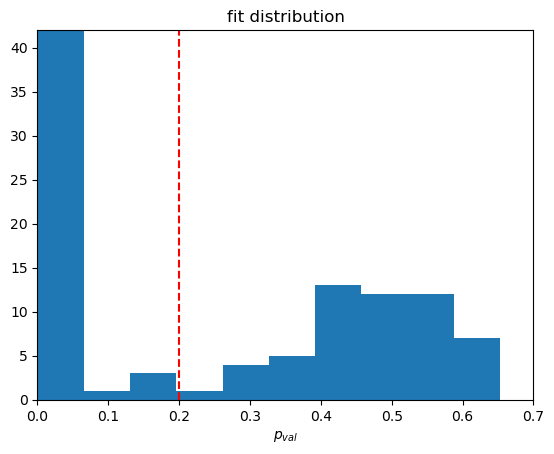

In [25]:
plt.title('fit distribution')
plt.xlabel(r'$p_{val}$')
plt.plot([0.2,0.2],[0,42],color='red',linestyle='--')
plt.ylim(0,42)
plt.xlim(0,0.7)
plt.hist(hist['p_val'],10)
plt.show()

In [26]:
selected_RN_tuples = phr.cross_section_fitter.fit_organizer.select_RN_based_on_property(results_dict,'p_val',0.2)

In [27]:
len(selected_RN_tuples)

54

# Final fits (with barrett moments)

In [28]:
ini_settings = {'datasets':['Ottermann1982'],'datasets_barrett_moment':[],'monotonous_decrease_precision':np.inf}

In [29]:
results_dict_bar = phr.cross_section_fitter.fit_organizer.parallel_fitting_manual(['Ottermann1982'],18,40,selected_RN_tuples,redo_N=True,monotonous_decrease_precision=0.04,barrett_moment_keys=['Fricke1995_2p'],initialize_from=ini_settings,cross_section_args=args_optimised)

Queuing 54 tasks, which will be performed over 6 processes.
Finished all tasks.
Check if any fits need to be redone.
For R5.5_N7 chi^2 with 1 less parameter is more than 1 permil better: 75.02441442179081 vs 73.61641710888675
For R5.75_N6 chi^2 with 1 less parameter is more than 1 permil better: 44.347673437528115 vs 36.51010900429935
For R6.25_N7 chi^2 with 1 less parameter is more than 1 permil better: 12.922886655763117 vs 12.696373836355729
For R6.5_N6 chi^2 with 1 less parameter is more than 1 permil better: 12.331999506437977 vs 11.468277928173462
For R6.5_N7 chi^2 with 1 less parameter is more than 1 permil better: 17.757075748062874 vs 12.331999506437977
For R6.75_N6 chi^2 with 1 less parameter is more than 1 permil better: 11.684659575964368 vs 11.214757327616265
For R7.0_N6 chi^2 with 1 less parameter is more than 1 permil better: 12.337214998448282 vs 11.038493441175275
For R7.75_N8 chi^2 with 1 less parameter is more than 1 permil better: 13.441983755261631 vs 10.6493153405

In [30]:
database_tables_bar, Rs, Ns, hist_bar = phr.cross_section_fitter.generate_data_tables(results_dict_bar)

In [31]:
pd.DataFrame(database_tables_bar['p_val'],index=Rs,columns=Ns)

4.0           5.0           6.0           7.0       8.0
5.50  8.017157e-11  4.808544e-11  1.721447e-10  6.711495e-11       NaN
5.75  2.421712e-05  8.747311e-04  1.646052e-03  2.528833e-04       NaN
6.00  6.082790e-03  1.044867e-01  1.379875e-01  1.018921e-01       NaN
6.25  7.174326e-02  4.994539e-01  4.715287e-01  3.914915e-01       NaN
6.50  2.188445e-01  6.489206e-01  5.716606e-01  4.196954e-01       NaN
6.75  3.752092e-01  6.690887e-01  5.928473e-01  5.170287e-01       NaN
7.00  5.211162e-01  6.830094e-01  6.072461e-01  5.298765e-01       NaN
7.25  6.565510e-01  6.948840e-01  6.196082e-01  5.422715e-01       NaN
7.50  7.559025e-01  7.031373e-01  6.284819e-01  5.518281e-01  0.465547
7.75  3.602158e-01  7.092284e-01  6.362129e-01  5.591871e-01  0.473111
8.00  7.088159e-28  7.144722e-01  6.417585e-01  5.635639e-01  0.478109
8.25           NaN  7.172388e-01  6.459761e-01  5.652250e-01  0.476158
8.50           NaN           NaN  6.493082e-01  5.681952e-01  0.482487

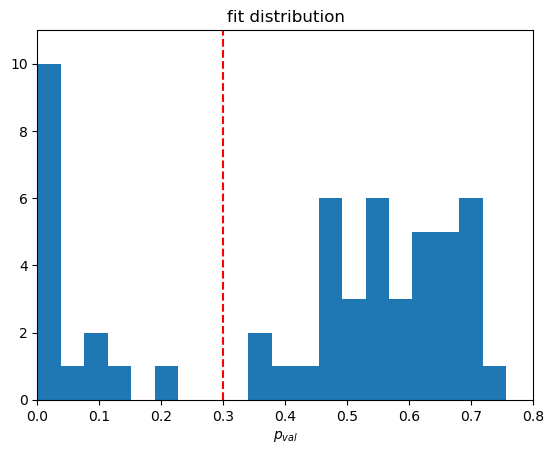

In [32]:
plt.title('fit distribution')
plt.xlabel(r'$p_{val}$')
plt.ylim(0,11)
plt.xlim(0,0.8)
plt.plot([0.3,0.3],[0,42],color='red',linestyle='--')
plt.hist(hist_bar['p_val'],20)
plt.show()

In [33]:
qs=[50,235,370,600]
results_dict_bar_sel, results_dict_bar_veto, veto_fct = phr.cross_section_fitter.fit_organizer.split_based_on_asymptotic_and_p_val(results_dict_bar,qs=qs,p_val_lim=0.3)

Asymptotic Parameter: m=4


In [34]:
# check asymptotics choice

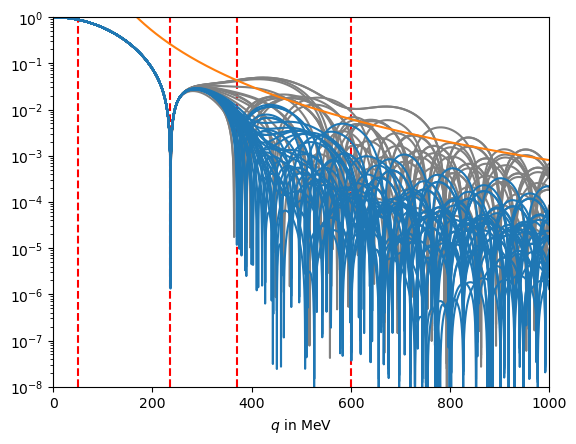

In [35]:
q = np.arange(1e-1,1000,1e-1)
for key in results_dict_bar_sel:
    result=results_dict_bar_sel[key]
    nuc_result = phr.nucleus('Ar40_FB_test_'+key,18,40,ai=result['ai'],R=result['R'])
    plt.plot(q,np.abs(nuc_result.form_factor(q)),color='C0',zorder=1)
for key in results_dict_bar_veto:
    result=results_dict_bar_veto[key]
    nuc_result = phr.nucleus('Ar40_FB_test_'+key,18,40,ai=result['ai'],R=result['R'])
    plt.plot(q,np.abs(nuc_result.form_factor(q)),color='gray',zorder=-3)
for qi in qs:
    plt.plot([qi,qi],[1e-8,1e0],color='red',zorder=-5,linestyle='--')
plt.plot(q,veto_fct(q),color='C1')
plt.xlim(0,1000)
plt.ylim(1e-8,1e0)
plt.xlabel('form factor')
plt.xlabel('$q$ in MeV')
plt.yscale('log')

In [36]:
# select best result
best_key_bar = None
best_p_val = 0
for key in results_dict_bar_sel:
    p_val = results_dict_bar_sel[key]['p_val']
    if p_val > best_p_val:
        best_p_val = p_val
        best_key_bar = key
best_key_bar, best_p_val

('R7.5_N4', np.float64(0.7559024546771846))

In [37]:
phr.cross_section_fitter.pickler.promote_best_fit(best_key_bar,results_dict_bar_sel)

Saving best result to ./data/best_fits/best_fit_result_Z18_A40.pkl
Saving results for systematics to ./data/best_fits/best_fit_result_Z18_A40_systematics


In [38]:
best_results_dict_bar = phr.cross_section_fitter.uncertainties.add_systematic_uncertainties(best_key_bar,results_dict_bar_sel)

In [39]:
best_nuc_result = phr.nucleus('Ar40_FB_best_test',18,40,ai=best_results_dict_bar['ai'],R=best_results_dict_bar['R'])
best_cov_ai_model = best_results_dict_bar['cov_ai_model']
best_cov_ai_stat = best_results_dict_bar['cov_ai_stat'] * np.sqrt(best_results_dict_bar['redchisq'])
best_cov_ai_syst = best_results_dict_bar['cov_ai_syst']

Text(0, 0.5, '$\\rho$ in fm$^{-3}$')

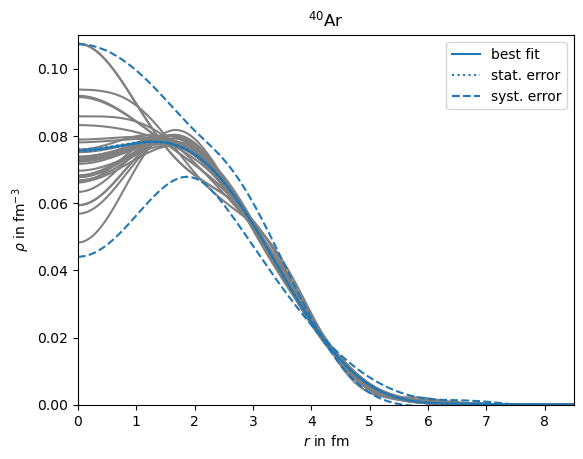

In [40]:
r = np.arange(0,15,1e-2)
best_rho = best_nuc_result.charge_density(r)
plt.plot(r,best_rho,color='C0',zorder=2,label='best fit')
best_jac_rho = best_nuc_result.charge_density_jacobian(r)
best_drho_model = np.sqrt(np.einsum('ij,ik,kj->j',best_jac_rho,best_cov_ai_model,best_jac_rho))
best_drho_stat = np.sqrt(np.einsum('ij,ik,kj->j',best_jac_rho,best_cov_ai_stat,best_jac_rho))
best_drho_syst = np.sqrt(np.einsum('ij,ik,kj->j',best_jac_rho,best_cov_ai_syst,best_jac_rho))
plt.plot(r,best_rho+best_drho_stat,color='C0',linestyle=':',zorder=1,label='stat. error')
plt.plot(r,best_rho-best_drho_stat,color='C0',linestyle=':',zorder=1)
plt.plot(r,best_rho+best_drho_syst,color='C0',linestyle='--',zorder=1,label='syst. error')
plt.plot(r,best_rho-best_drho_syst,color='C0',linestyle='--',zorder=1)
for key in results_dict_bar_sel:
    result=results_dict_bar_sel[key]
    nuc_result = phr.nucleus('Ar40_FB_test_'+key,18,40,ai=result['ai'],R=result['R'])
    plt.plot(r,nuc_result.charge_density(r),color='gray',zorder=-2) #,label=key
#plt.plot(r,nuc_Ar40_ref.charge_density(r),color='C1',zorder=-1,label=nuc_Ar40_ref.name)
plt.xlim(0,8.5)
plt.ylim(0,0.11)
plt.legend()
plt.title('$^{40}$Ar')
plt.xlabel('$r$ in fm')
plt.ylabel(r'$\rho$ in fm$^{-3}$')
#plt.yscale('log')

In [41]:
print_radius(best_results_dict_bar,+1)

<IPython.core.display.Math object>